In [1]:
import chromadb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
chroma_client = chromadb.PersistentClient(
    path="./persistent_db"
)


In [3]:
collection = chroma_client.get_or_create_collection(
    name="cv_doc",
    metadata={"hnsw:space": "cosine"}
)
print(collection)

Collection(name=cv_doc)


In [4]:
data_embeddings = collection.get(include = ["embeddings"])
list_of_embeddings = data_embeddings["embeddings"]
ids = data_embeddings["ids"]
#print(list_of_embeddings)

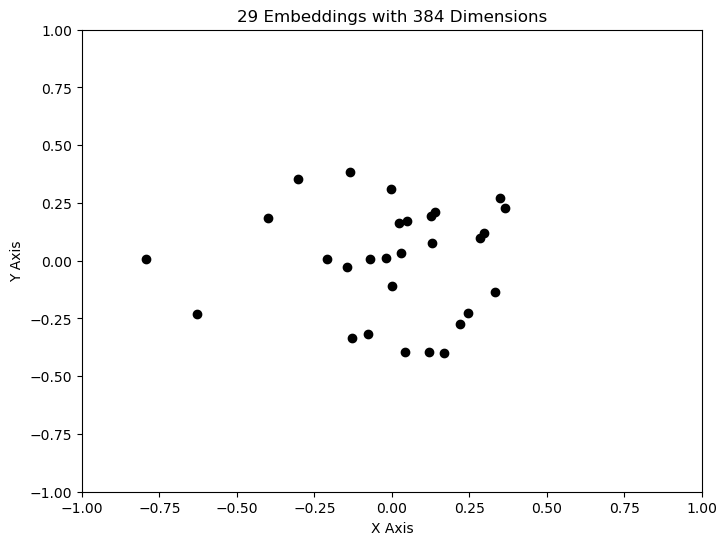

In [5]:
numpy_array = np.array(list_of_embeddings)
#print(numpy_array.shape)

# creates a figure
fig, ax = plt.subplots(figsize=(8,6))

# Reduce dimensions

pca = PCA(n_components = 2)
embeddings_pca = pca.fit_transform(numpy_array)

for i, embedding in enumerate(embeddings_pca):
    ax.scatter(*embedding, c='k')
    #ax.annotate(f'{ids[i]}', (embedding[0],embedding[1]), xytext=(-1,-1), textcoords='offset points', ha='right', va='top')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.title(f"{numpy_array.shape[0]} Embeddings with {numpy_array.shape[1]} Dimensions")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

#Show the plot
plt.show()